In [2]:
import pandas as pd
import numpy as np

In [3]:
train_ratings = pd.read_csv('/data/ephemeral/home/book/code/data/train_ratings.csv')
books = pd.read_csv("/data/ephemeral/home/book/code/data/books.csv")
users = pd.read_csv("/data/ephemeral/home/book/code/data/users.csv")
test_ratings = pd.read_csv("/data/ephemeral/home/book/code/data/test_ratings.csv")

In [4]:
train_ratings.head()

,user_id,isbn,rating
0,8,0002005018,4
1,67544,0002005018,7
2,123629,0002005018,8
3,200273,0002005018,8
4,210926,0002005018,9


In [5]:
train_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306795 entries, 0 to 306794
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   user_id  306795 non-null  int64 
 1   isbn     306795 non-null  object
 2   rating   306795 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 7.0+ MB


In [6]:
train_ratings.describe()

,user_id,rating
count,306795.000000,306795.000000
mean,136128.416099,7.069714
std,80512.194379,2.433217
min,8.000000,1.000000
25%,67591.000000,6.000000
50%,134076.000000,8.000000
75%,206438.000000,9.000000
max,278854.000000,10.000000


In [7]:
print(len(train_ratings))
print(train_ratings.isnull().sum())
print(train_ratings.isnull().sum().sum())
print(len(train_ratings["isbn"].unique()))
print(len(train_ratings["rating"].unique()))
print(len(train_ratings["user_id"].unique()))
print(sorted(train_ratings["rating"].unique()))
print(train_ratings.dtypes)

306795
user_id    0
isbn       0
rating     0
dtype: int64
0
129777
10
59803
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
user_id     int64
isbn       object
rating      int64
dtype: object


In [8]:
books.head()

,isbn,book_title,book_author,year_of_publication,publisher,img_url,language,category,summary,img_path
0,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,en,['Actresses'],"In a small town in Canada, Clara Callan reluct...",images/0002005018.01.THUMBZZZ.jpg
1,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,en,['1940-1949'],"Here, for the first time in paperback, is an o...",images/0060973129.01.THUMBZZZ.jpg
2,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,en,['Medical'],"Describes the great flu epidemic of 1918, an o...",images/0374157065.01.THUMBZZZ.jpg
3,0399135782,The Kitchen God's Wife,Amy Tan,1991.0,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,en,['Fiction'],A Chinese immigrant who is convinced she is dy...,images/0399135782.01.THUMBZZZ.jpg
4,0425176428,What If?: The World's Foremost Military Histor...,Robert Cowley,2000.0,Berkley Publishing Group,http://images.amazon.com/images/P/0425176428.0...,en,['History'],"Essays by respected military historians, inclu...",images/0425176428.01.THUMBZZZ.jpg


In [9]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149570 entries, 0 to 149569
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   isbn                 149570 non-null  object 
 1   book_title           149570 non-null  object 
 2   book_author          149569 non-null  object 
 3   year_of_publication  149570 non-null  float64
 4   publisher            149570 non-null  object 
 5   img_url              149570 non-null  object 
 6   language             82343 non-null   object 
 7   category             80719 non-null   object 
 8   summary              82343 non-null   object 
 9   img_path             149570 non-null  object 
dtypes: float64(1), object(9)
memory usage: 11.4+ MB


In [10]:
books.describe()

,year_of_publication
count,149570.000000
mean,1994.590606
std,8.179733
min,1376.000000
25%,1991.000000
50%,1996.000000
75%,2000.000000
max,2006.000000


In [11]:
print(len(books))
print(books.isnull().sum())
print(books.isnull().sum().sum())
print(len(books["isbn"].unique()))
print(len(books["book_title"].unique()))
print(len(books["book_author"].unique()))
print(len(books["year_of_publication"].unique()))
print(len(books["publisher"].unique()))
print(len(books["img_url"].unique()))
print(len(books["language"].unique()))
print(len(books["category"].unique()))
print(len(books["summary"].unique()))
print(len(books["img_path"].unique()))
print(sorted(books["year_of_publication"].unique()))
print(books.dtypes)

149570
isbn                       0
book_title                 0
book_author                1
year_of_publication        0
publisher                  0
img_url                    0
language               67227
category               68851
summary                67227
img_path                   0
dtype: int64
203306
149570
135436
62059
95
11571
149570
27
4293
79873
149570
[1376.0, 1378.0, 1806.0, 1900.0, 1901.0, 1902.0, 1904.0, 1906.0, 1908.0, 1911.0, 1920.0, 1923.0, 1924.0, 1925.0, 1926.0, 1927.0, 1928.0, 1929.0, 1930.0, 1931.0, 1932.0, 1933.0, 1934.0, 1935.0, 1936.0, 1937.0, 1938.0, 1939.0, 1940.0, 1941.0, 1942.0, 1943.0, 1944.0, 1945.0, 1946.0, 1947.0, 1948.0, 1949.0, 1950.0, 1951.0, 1952.0, 1953.0, 1954.0, 1955.0, 1956.0, 1957.0, 1958.0, 1959.0, 1960.0, 1961.0, 1962.0, 1963.0, 1964.0, 1965.0, 1966.0, 1967.0, 1968.0, 1969.0, 1970.0, 1971.0, 1972.0, 1973.0, 1974.0, 1975.0, 1976.0, 1977.0, 1978.0, 1979.0, 1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0, 1

In [12]:
users.head()

,user_id,location,age
0,8,"timmins, ontario, canada",NaN
1,11400,"ottawa, ontario, canada",49.0
2,11676,"n/a, n/a, n/a",NaN
3,67544,"toronto, ontario, canada",30.0
4,85526,"victoria, british columbia, canada",36.0


In [13]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68092 entries, 0 to 68091
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   68092 non-null  int64  
 1   location  68092 non-null  object 
 2   age       40259 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.6+ MB


In [14]:
users.describe()

,user_id,age
count,68092.000000,40259.000000
mean,139381.329539,36.069873
std,80523.969862,13.842571
min,8.000000,5.000000
25%,69008.750000,25.000000
50%,138845.500000,34.000000
75%,209388.250000,45.000000
max,278854.000000,99.000000


In [15]:
users.isna().sum()

user_id         0
location        0
age         27833
dtype: int64

In [16]:
print(len(users))
print(users.isna().sum().sum())
print(len(users["user_id"].unique()))
print(len(users["location"].unique()))
print(len(users["age"].unique()))
print(users.dtypes)

68092
27833
68092
18368
92
user_id       int64
location     object
age         float64
dtype: object


In [17]:
test_ratings.head()

,user_id,isbn,rating
0,11676,0002005018,0
1,116866,0002005018,0
2,152827,0060973129,0
3,157969,0374157065,0
4,67958,0399135782,0


In [18]:
test_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76699 entries, 0 to 76698
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  76699 non-null  int64 
 1   isbn     76699 non-null  object
 2   rating   76699 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.8+ MB


In [19]:
test_ratings.describe()

,user_id,rating
count,76699.000000,76699.0
mean,135657.157434,0.0
std,80365.956646,0.0
min,14.000000,0.0
25%,67638.500000,0.0
50%,133228.000000,0.0
75%,205473.000000,0.0
max,278854.000000,0.0


In [20]:
test_ratings.isna().sum()

user_id    0
isbn       0
rating     0
dtype: int64

In [21]:
print(len(test_ratings))
print(test_ratings.isna().sum().sum())
# unique
print(len(test_ratings["isbn"].unique())) # 52,000
print(len(test_ratings["rating"].unique())) # 1
print(len(test_ratings["user_id"].unique())) # 26,167
print(sorted(test_ratings["rating"].unique())) # [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# data의 feature 자료형
print(test_ratings.dtypes)

76699
0
52000
1
26167
[0]
user_id     int64
isbn       object
rating      int64
dtype: object


/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 52852 (\N{HANGUL SYLLABLE KA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 53580 (\N{HANGUL SYLLABLE TE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/cond

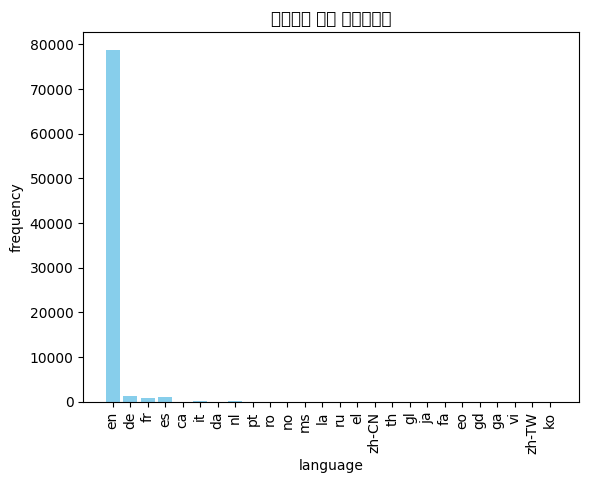

In [22]:
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

# 데이터 준비 (예시, 결측치 포함)
categories = books["language"]

# 결측치 제거
cleaned_categories = [cat for cat in categories if cat is not None and cat is not np.nan]

# 카테고리의 빈도 세기
frequency = Counter(cleaned_categories)

# 카테고리와 빈도 리스트로 변환
labels = list(frequency.keys())
values = list(frequency.values())

# 막대그래프 그리기
plt.bar(labels, values, color='skyblue')

# 그래프 제목과 축 레이블 설정
plt.title('카테고리 빈도 막대그래프')
plt.xlabel('language')
plt.ylabel('frequency')


plt.xticks(rotation=90)
# 그래프 보여주기
plt.show()

In [23]:
books["book_author"].unique()

array(['Richard Bruce Wright', "Carlo D'Este", 'Gina Bari Kolata', ...,
       'Claude Dooley', 'Jeremy Lloyd', 'Mapsco'], dtype=object)

In [24]:
print(books[books['book_author'].isnull()])

             isbn                book_title book_author  year_of_publication  \
73737  0751352497  A+ Quiz Masters:01 Earth         NaN               1999.0   

                publisher                                            img_url  \
73737  Dorling Kindersley  http://images.amazon.com/images/P/0751352497.0...   

      language category summary                           img_path  
73737      NaN      NaN     NaN  images/0751352497.01.THUMBZZZ.jpg  


In [25]:
books["book_author"].unique()

array(['Richard Bruce Wright', "Carlo D'Este", 'Gina Bari Kolata', ...,
       'Claude Dooley', 'Jeremy Lloyd', 'Mapsco'], dtype=object)

In [26]:
# 결측치 제거 후 저자 리스트에서 10글자 넘는 저자 필터링
long_authors = [author for author in books["book_author"].dropna().unique() if len(author) > 70]

print("10글자 넘는 저자:", long_authors)

10글자 넘는 저자: ["Based on the Larger Work'the Book of Garden Flowers'by G.a.R.Phillips Compiled by David Pycraft Illustrated by Joan Lupton", 'Staceyann Chin, Dot Antoniades, Aileen Reyes, Meaghan Williams, Miriam Stanley, Amy Ouzoonian Kyrce Swenson']


In [28]:
len(train_ratings["isbn"].unique())

129777

In [30]:
# ISBN별 카운트 계산
isbn_counts = train_ratings.groupby('isbn').size().reset_index(name='count')

# 카운트를 기준으로 정렬 (내림차순)
sorted_isbn_counts = isbn_counts.sort_values(by='count', ascending=False)

print(sorted_isbn_counts)

              isbn  count
19087   0316666343    566
102568  0971880107    465
34048   0385504209    390
15659   0312195516    307
3601    0060928336    256
...            ...    ...
62497   0609605844      1
62512   0609606441      1
62510   0609606336      1
62508   0609606255      1
62491   0609605305      1

[129777 rows x 2 columns]


In [31]:
# ISBN 기준으로 평점 평균과 카운트 계산
isbn_stats = train_ratings.groupby('isbn').agg(
    average_rating=('rating', 'mean'),
    count=('rating', 'count')
).reset_index()
isbn_stats

,isbn,average_rating,count
0,0000913154,8.0,1
1,000104687X,6.0,1
2,0001047213,8.0,1
3,0001047973,9.0,2
4,000104799X,6.0,1
...,...,...,...
129772,B0001FZGBC,7.0,1
129773,B0001FZGPI,6.0,1
129774,B0001FZGRQ,9.0,1
129775,B0001GMSV2,8.0,2


In [32]:
# 카운트를 기준으로 정렬 (내림차순)
sorted_isbn_counts = isbn_stats.sort_values(by='count', ascending=False)

print(sorted_isbn_counts)

              isbn  average_rating  count
19087   0316666343        7.816254    566
102568  0971880107        3.154839    465
34048   0385504209        8.058974    390
15659   0312195516        7.641694    307
3601    0060928336        7.445312    256
...            ...             ...    ...
62497   0609605844        8.000000      1
62512   0609606441        9.000000      1
62510   0609606336       10.000000      1
62508   0609606255        8.000000      1
62491   0609605305        9.000000      1

[129777 rows x 3 columns]


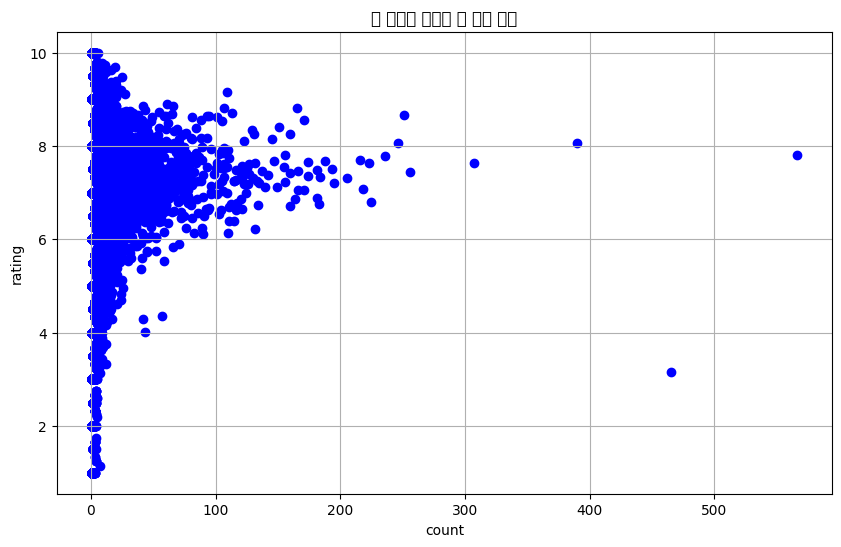

In [34]:
# 산점도 그리기
plt.figure(figsize=(10, 6))
plt.scatter(isbn_stats['count'], isbn_stats['average_rating'], color='blue')

# 그래프 제목과 축 레이블 설정
plt.title('책 평점과 페이지 수 간의 관계')
plt.xlabel('count')
plt.ylabel('rating')

# 그래프 보여주기
plt.grid(True)
plt.show()

In [35]:
isbn_stats[['count', 'average_rating']].corr()

,count,average_rating
count,1.00000,0.02211
average_rating,0.02211,1.00000


In [ ]:
isbn_counts

,isbn,count
0,0000913154,1
1,000104687X,1
2,0001047213,1
3,0001047973,2
4,000104799X,1
...,...,...
129772,B0001FZGBC,1
129773,B0001FZGPI,1
129774,B0001FZGRQ,1
129775,B0001GMSV2,2


In [ ]:
merged_df = pd.merge(books, isbn_counts, how='left', on='isbn')

In [ ]:
merged_df.isna().sum()

isbn                       0
book_title                 0
book_author                1
year_of_publication        0
publisher                  0
img_url                    0
language               67227
category               68851
summary                67227
img_path                   0
count                  19793
dtype: int64

In [ ]:
merged_df["count"] = merged_df["count"].fillna(0)

In [ ]:
merged_df.isna().sum()

isbn                       0
book_title                 0
book_author                1
year_of_publication        0
publisher                  0
img_url                    0
language               67227
category               68851
summary                67227
img_path                   0
count                      0
dtype: int64

In [36]:
isbn_stats.describe()

,average_rating,count
count,129777.000000,129777.000000
mean,6.932618,2.364017
std,2.286600,6.410544
min,1.000000,1.000000
25%,6.000000,1.000000
50%,7.333333,1.000000
75%,8.500000,2.000000
max,10.000000,566.000000


In [43]:
# 평점(rating) 값이 1 미만인 행 제거
filtered_df = isbn_stats[isbn_stats['count'] >= 1]

print(filtered_df.describe())

       average_rating          count
count   129777.000000  129777.000000
mean         6.932618       2.364017
std          2.286600       6.410544
min          1.000000       1.000000
25%          6.000000       1.000000
50%          7.333333       1.000000
75%          8.500000       2.000000
max         10.000000     566.000000


In [86]:
1-(1-5.5)*2.7**(-np.log(2)) 

3.260549060108506

In [79]:
2.7**(-np.log(4))

0.2523497310201209